# Librerías necesarias que se deben importar

In [4]:
import os
# Imports numéricos
import numpy as np
from scipy.stats import uniform, triang, norm, cauchy, expon, gamma, erlang, lognorm, beta, weibull_min
# Imports gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk',style='whitegrid',font='serif')
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipywidgets import widgets
from IPython.display import display

# Análisis de datos de entrada

Todas las distribuiones utilizadas en este notebook provienen de [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

En este notebook vamos a explorar las distribuciones comunmemnte utilizadas en simulación de eventos discretos para modelar parámetros estocásticos.

# Gráfico interactivo de una [distribución Normal](https://en.wikipedia.org/wiki/Normal_distribution)

In [62]:
# histograma de distribución normal.
def interactive_normal_histogram(mu,sigma,samples):
    plt.figure(figsize=(5,5))
    datos = np.random.normal(mu, sigma, samples)
    cuenta, cajas, ignorar = plt.hist(datos, 20)
    plt.xlabel('x')
    plt.ylabel('$Frecuencia$')
    plt.title('Distribución Normal')
    plt.show()
    
input1Float = widgets.FloatSlider(value=0, min=-4, max=4, step=0.01, description="mu :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=0.5, max=5, step=0.01, description="sigma :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

#Remember to activate jupyter nbextension enable --py widgetsnbextension
widgets.interactive(interactive_normal_histogram, mu=input1Float, sigma=input2Float, samples=input3Float)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='mu :', max=4.0, min=-4.0, s…

## Función de Densidad de Probabilidad

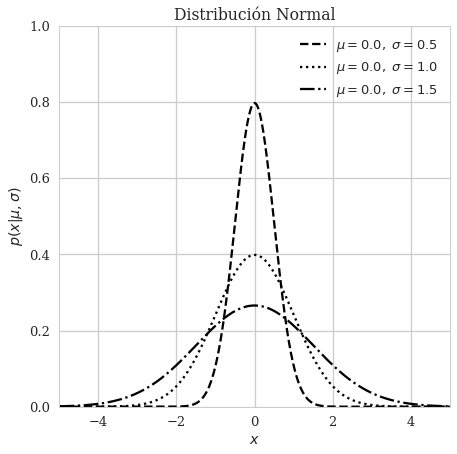

In [67]:
# Normal Distribution
# Probability Density Function
mean = [0,0,0]
std = [0.5,1,1.5]
linestyles = ['--', ':', '-.']
x = np.linspace(-5, 5, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(mean, std, linestyles):
    dist = stats.norm(loc=a, scale=b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%.1f,\ \sigma=%.1f$' % (a, b))

plt.xlim(-5, 5)
plt.ylim(0, 1)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title(r'Distribución Normal')

plt.legend(loc='best')
#fig.savefig('normalPDF.pdf')
plt.show()

## Función de Densidad Acumulada

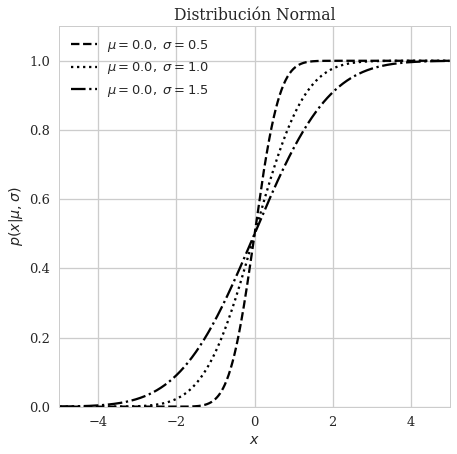

In [97]:
# Normal Distribution
# Cumulative Density Function
mean = [0,0,0]
std = [0.5,1,1.5]
linestyles = ['--', ':', '-.']
x = np.linspace(-5, 5, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(mean, std, linestyles):
    dist = stats.norm(loc=a, scale=b)

    plt.plot(x, dist.cdf(x), ls=ls, c='black',
             label=r'$\mu=%.1f,\ \sigma=%.1f$' % (a, b))

plt.xlim(-5, 5)
plt.ylim(0, 1.1)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title(r'Distribución Normal')

plt.legend(loc='best')
#fig.savefig('normalCDF.pdf')
plt.show()

# Gráfico interactivo de una [distribución Uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))

In [23]:
# histograma de distribución normal.
def interactive_uniform_histogram(a,b,samples,bins):
    plt.figure(figsize=(5,5))
    uniform = stats.uniform(loc=a, scale=b)
    aleatorios = uniform.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('x')
    plt.ylabel('$Frecuencia$')
    plt.title('Distribución Uniforme')
    plt.show()


input1Float = widgets.FloatSlider(value=0, min=-4, max=4, step=0.01, description="loc :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=1, max=5, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

#Remember to activate jupyter nbextension enable --py widgetsnbextension
widgets.interactive(interactive_uniform_histogram, a=input1Float, b=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='loc :', max=4.0, min=-4.0, …

## Función de Densidad de Probabilidad

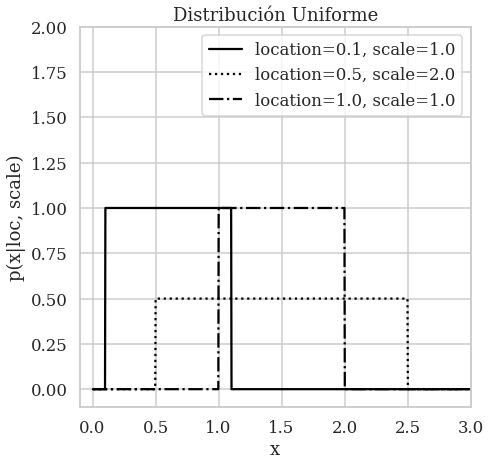

In [2]:
#Distribucion uniforme
#Probability density function
fig, ax = plt.subplots(figsize=(7, 7))
x = np.linspace(0, 3, 1002)[1:-1]
loc = [0.1,0.5,1]
scale = [1,2,1]
linestyles = ['-', ':', '-.']

for a, b, ls in zip(loc, scale, linestyles):
    dist = stats.uniform(loc=a, scale=b)

    plt.plot(x, dist.pdf(x),ls=ls, c='black',
             label='location=%.1f, scale=%.1f' % (a, b))

plt.xlim(-0.1, 3)
plt.ylim(-0.1, 2)

plt.xlabel('x')
plt.ylabel('p(x|loc, scale)')
plt.title('Distribución Uniforme')

plt.legend(loc='best')
#fig.savefig('uniformePDF.pdf')
plt.show()

In [13]:
# Graficando uniforme
def interactive_uniform(loc,scale):
    plt.figure(figsize=(7,7))
    dist = stats.uniform(loc=loc, scale=scale)
    x = np.linspace(-1, 5.5, 1002)[1:-1]
    pdf = dist.pdf(x) # Función de Masa de Probabilidad
    plt.plot(x, pdf, ls='-', c='black',
             label='location=%.1f, scale=%.1f' % (loc, scale))
    plt.xlim(-0.5, 5.5)
    plt.ylim(-0.1, 1.2)
    plt.xlabel('x')
    plt.ylabel('p(x|loc, scale)')
    plt.title('Distribución Uniforme')
    plt.legend(loc='best')
    
input1Float = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description="location :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=2, min=1, max=4, step=0.1, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_uniform, loc=input1Float, scale=input2Float)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='location :', max=1.0, step=…

## Función de Densidad Acumulada

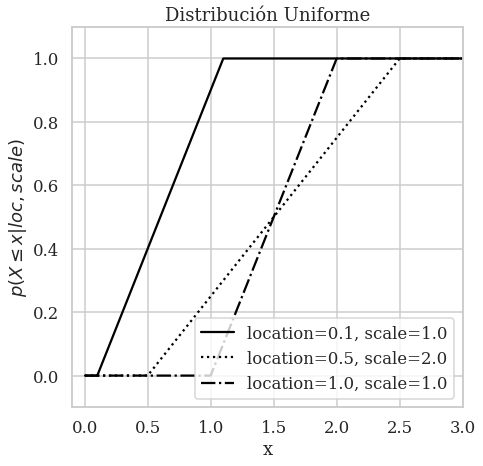

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
x = np.linspace(0, 3, 1002)[1:-1]
loc = [0.1,0.5,1]
scale = [1,2,1]
linestyles = ['-', ':', '-.']

for a, b, ls in zip(loc, scale, linestyles):
    dist = stats.uniform(loc=a, scale=b)

    plt.plot(x, dist.cdf(x),ls=ls, c='black',
             label='location=%.1f, scale=%.1f' % (a, b))

plt.xlim(-0.1, 3)
plt.ylim(-0.1, 1.1)

plt.xlabel('x')
plt.ylabel('$p(X\leq x|loc, scale)$')
plt.title('Distribución Uniforme')

plt.legend(loc='best')
#fig.savefig('uniformeCDF.pdf')
plt.show()

In [14]:
# Graficando uniforme
def interactive_cumulative_uniform(loc,scale):
    plt.figure(figsize=(7,7))
    dist = stats.uniform(loc=loc, scale=scale)
    x = np.linspace(-1, 5.5, 1002)[1:-1]
    pdf = dist.cdf(x) # Función de Masa de Probabilidad
    plt.plot(x, pdf, ls='-', c='black',
             label='location=%.1f, scale=%.1f' % (loc, scale))
    plt.xlim(-0.5, 5.5)
    plt.ylim(-0.1, 1.2)
    plt.xlabel('x')
    plt.ylabel('p(x|loc, scale)')
    plt.title('Distribución Uniforme')
    plt.legend(loc='best')
    
input1Float = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description="location :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=2, min=1, max=4, step=0.1, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_cumulative_uniform, loc=input1Float, scale=input2Float)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='location :', max=1.0, step=…

# Gráfico interactivo de una [Distribución Triangular](https://en.wikipedia.org/wiki/Triangular_distribution) 

## Función de Densidad de Probabilidad

In [21]:
# histograma de distribución normal.
def interactive_triangular_histogram(c,a,b,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.triang(c=c, loc=a, scale=b)
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('$Frecuencia$')
    plt.title('Distribución Triangular')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=0, min=-4, max=4, step=0.01, description="loc :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=0.3, min=0.1, max=0.9, step=0.01, description="c :", orientation="horizontal",continuous_update=False)
input3Float = widgets.FloatSlider(value=1, min=1, max=5, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)
input4Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input5Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_triangular_histogram, a=input1Float, b=input3Float, c=input2Float, samples=input4Float, bins=input5Float)

interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='c :', max=0.9, min=0.1, ste…

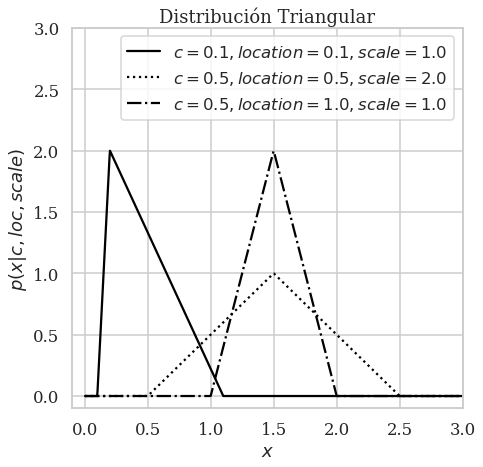

In [7]:
#Distribucion Triangular
#Probability density function
fig, ax = plt.subplots(figsize=(7, 7))
x = np.linspace(0, 3, 1002)[1:-1]
c = [0.1,0.5,0.5]
loc = [0.1,0.5,1]
scale = [1,2,1]
linestyles = ['-', ':', '-.']

for c,a,b,ls in zip(c,loc, scale, linestyles):
    dist = triang(c=c, loc=a, scale=b)

    plt.plot(x, dist.pdf(x),ls=ls, c='black',
             label='$ c=%.1f, location=%.1f, scale=%.1f$' % (c,a,b))

plt.xlim(-0.1, 3)
plt.ylim(-0.1, 3)

plt.xlabel('$x$')
plt.ylabel('$p(x|c, loc, scale)$')
plt.title('Distribución Triangular')

plt.legend(loc='best')
#fig.savefig('triangularPDF.pdf')
plt.show()

In [6]:
# Graficando uniforme
def interactive_triangular(c,loc,scale):
    plt.figure(figsize=(7,7))
    dist = stats.triang(c=c, loc=loc, scale=scale)
    x = np.linspace(-1, 6.5, 1002)[1:-1]
    pdf = dist.pdf(x) # Función de Masa de Probabilidad
    plt.plot(x, pdf, ls='-', c='black',
             label='$ c=%.1f, location=%.1f, scale=%.1f$' % (c,loc,scale))
    plt.xlim(-1, 6.5)
    plt.ylim(-0.1, 3)

    plt.xlabel('$x$')
    plt.ylabel('$p(x|c, loc, scale)$')
    plt.title('Distribución Triangular')
    plt.legend(loc='best')
    
input1Float = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description="c :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description="loc :", orientation="horizontal",continuous_update=False)
input3Float = widgets.FloatSlider(value=2, min=1, max=4, step=0.1, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_triangular, c=input1Float, loc=input2Float, scale=input3Float)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='c :', max=0.99, min=0.01, step=0.01), FloatSlider(value=1.0, continuous_update=False, description='loc :', max=2.0), FloatSlider(value=2.0, continuous_update=False, description='scale :', max=4.0, min=1.0), Output()), _dom_classes=('widget-interact',))

## Función de Densidad Acumulada

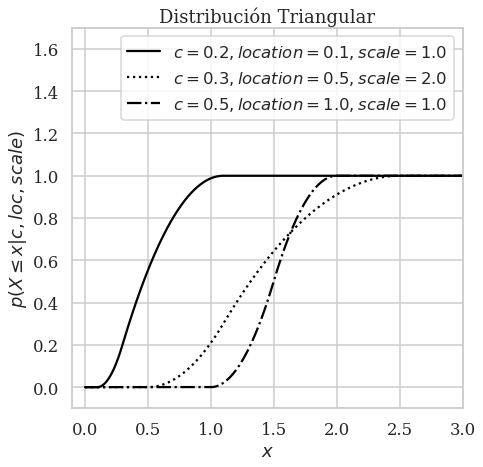

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
x = np.linspace(0, 3, 1002)[1:-1]
c = [0.2,0.3,0.5]
loc = [0.1,0.5,1]
scale = [1,2,1]
linestyles = ['-', ':', '-.']

for c,a,b,ls in zip(c,loc, scale, linestyles):
    dist = stats.triang(c=c, loc=a, scale=b)

    plt.plot(x, dist.cdf(x),ls=ls, c='black',
             label='$ c=%.1f, location=%.1f, scale=%.1f$' % (c,a,b))

plt.xlim(-0.1, 3)
plt.ylim(-0.1, 1.7)

plt.xlabel('$x$')
plt.ylabel('$p(X\leq x|c, loc, scale)$')
plt.title('Distribución Triangular')

plt.legend(loc='best')
#fig.savefig('triangularCDF.pdf')
plt.show()

In [8]:
def interactive_cummulative_triangular(c,loc,scale):
    plt.figure(figsize=(7,7))
    dist = stats.triang(c=c, loc=loc, scale=scale)
    x = np.linspace(-1, 6.5, 1002)[1:-1]
    pdf = dist.cdf(x) # Función de Masa de Probabilidad
    plt.plot(x, pdf, ls='-', c='black',
             label='$ c=%.1f, location=%.1f, scale=%.1f$' % (c,loc,scale))
    plt.xlim(-0.1, 6.5)
    plt.ylim(-0.1, 1.2)

    plt.xlabel('$x$')
    plt.ylabel('$p(X\leq x|c, loc, scale)$')
    plt.title('Distribución Triangular')
    plt.legend(loc='best')
    
input1Float = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description="c :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description="loc :", orientation="horizontal",continuous_update=False)
input3Float = widgets.FloatSlider(value=2, min=1, max=4, step=0.1, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_cummulative_triangular, c=input1Float, loc=input2Float, scale=input3Float)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='c :', max=0.99, min=0.01, step=0.01), FloatSlider(value=1.0, continuous_update=False, description='loc :', max=2.0), FloatSlider(value=2.0, continuous_update=False, description='scale :', max=4.0, min=1.0), Output()), _dom_classes=('widget-interact',))

# Gráfico interactivo de una [Distribución Beta](https://en.wikipedia.org/wiki/Beta_distribution) 

In [33]:
# histograma de distribución beta.
def interactive_beta_histogram(a,b,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.beta(a, b)
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('$Frecuencia$')
    plt.title('Distribución Beta')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=0.1, min=0.01, max=5, step=0.01, description="a :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=0.1, min=0.01, max=5, step=0.01, description="b :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_beta_histogram, a=input1Float, b=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='a :', max=5.0, min=0.01, st…

## Función de Densidad de Probabilidad

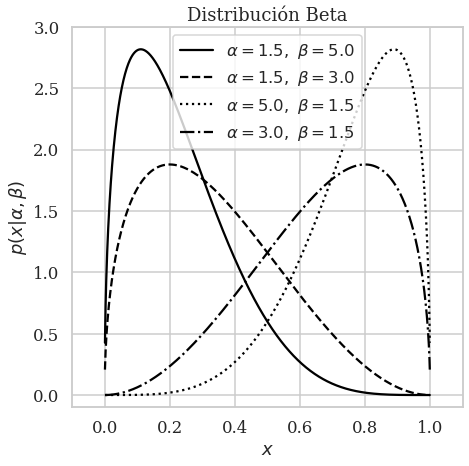

In [15]:
alpha_values = [1.5, 1.5, 5, 3]
beta_values = [5, 3, 1.5, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = stats.beta(a, b)
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Beta')

plt.legend(loc='best')
#fig.savefig('betaPDF1.pdf')
plt.show()

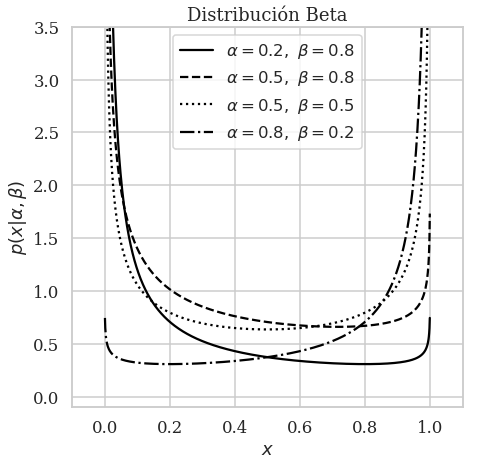

In [13]:
# Beta Distribution
# Probability Density Function
alpha_values = [0.2, 0.5, 0.5, 0.8]
beta_values = [0.8, 0.8, 0.5, 0.2]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = stats.beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 3.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Beta')

plt.legend(loc='best')
#fig.savefig('betaPDF3.pdf')
plt.show()

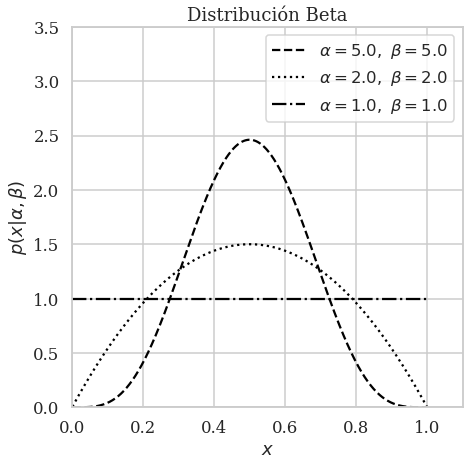

In [16]:
#Beta Distribution
# Probability Density Function
alpha_values = [5, 2, 1]
beta_values = [5, 2, 1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = stats.beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1.1)
plt.ylim(0, 3.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Beta')

plt.legend(loc='best')
#fig.savefig('betaPDF2.pdf')
plt.show()

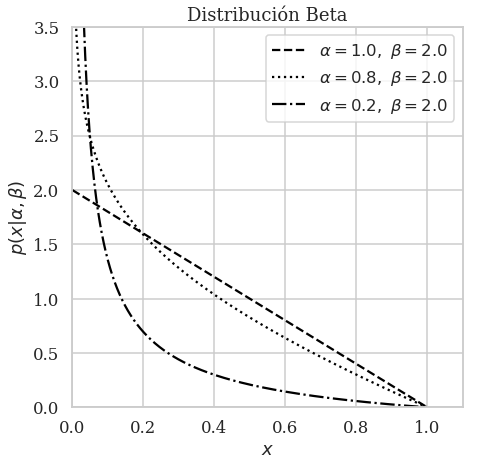

In [15]:
# Beta Distribution
# Probability Density Function

alpha_values = [1, 0.8, 0.2]
beta_values = [2, 2, 2]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = stats.beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1.1)
plt.ylim(0, 3.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Beta')

plt.legend(loc='best')
#fig.savefig('betaPDF4.pdf')
plt.show()

In [17]:
#Beta Distribution
x = np.linspace(-0.01, 1.02, 1002)[1:-1]
def interactive_beta(a,b):
    plt.figure(figsize=(8,8))
    plt.subplot(121)
    dist = stats.beta(a, b)
    v= dist.pdf(x)
    m = np.max(v)
    plt.plot(x, v, c='black',
    label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
    plt.xlim(-0.01, 1.1)
    plt.ylim(0, m+m*0.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\alpha,\beta)$')
    plt.title(r'Distribución Beta pdf') 

    plt.subplot(122)
    plt.xlim(-0.01, 1.1)
    plt.ylim(0, 1.2)
    v= dist.cdf(x)
    m = np.max(v)
    plt.plot(x, v, c='black',
    label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
    plt.xlabel('$x$')
    plt.ylabel(r'$p(X\leq x|\alpha,\beta)$')
    plt.title(r'Distribución Beta cdf') 
    plt.tight_layout()
    plt.show()

input1Float = widgets.FloatSlider(value=4, min=0.01, max=5, step=0.01, description="a :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=4, min=0.01, max=5, step=0.01, description="b :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_beta, a=input1Float, b=input2Float)

interactive(children=(FloatSlider(value=4.0, continuous_update=False, description='a :', max=5.0, min=0.01, st…

# Gráfico de una [Distribución Exponencial](https://en.wikipedia.org/wiki/Exponential_distribution)

In [68]:
def interactive_exponential_histogram(a,lam,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.expon(loc=a, scale=1/lam)
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('Frecuencia')
    plt.title('Distribución Exponencial')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=0, min=0, max=30, step=1, description="loc :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description="rate :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_exponential_histogram, a=input1Float, lam=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='loc :', max=30.0, step=1.0)…

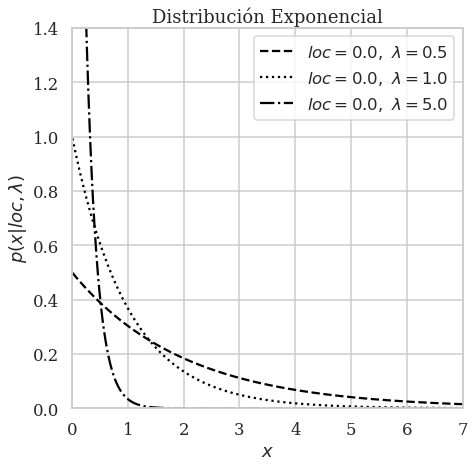

In [73]:
# Erlang Distribution
# Probability Density Function
loc = [0,0,0]
beta = [0.5,1,5]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(loc, beta, linestyles):
    dist = stats.expon(loc=a, scale=1/b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$loc=%.1f,\ \lambda=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 1.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|loc,\lambda)$')
plt.title(r'Distribución Exponencial')

plt.legend(loc='best')
plt.show()

In [82]:
#Erlang Distribution
x = np.linspace(-1, 15, 1002)[1:-1]
def interactive_exponential(loc,lam):
    plt.figure(figsize=(8,8))
    dist = stats.expon(loc=loc, scale=1/lam) 
    v=dist.pdf(x)
    m = np.max(v)
    plt.plot(x, v, c='black',
    label=r'$loc=%.1f,\ \lambda=%.1f$' % (loc,lam))
    plt.ylim(0, m+0.2*m)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|loc,\lambda)$')
    plt.title(r'Distribución Exponencial') 
    plt.show()


input1Float = widgets.FloatSlider(value=0, min=1, max=5, step=1, description="loc :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description="lambda :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_exponential, loc=input1Float, lam=input2Float)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='loc :', max=5.0, min=1.0, s…

# Gráfico de una [Distribución Erlang](https://en.wikipedia.org/wiki/Erlang_distribution)

In [61]:
def interactive_erlang_histogram(a,b,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.erlang(a=a, scale=b)
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('frecuencia')
    plt.title('Distribución Erlang')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=1, min=1, max=30, step=1, description="a :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=1, max=10, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_erlang_histogram, a=input1Float, b=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a :', max=30.0, min=1.0, st…

## Función de Densidad de Probabilidad

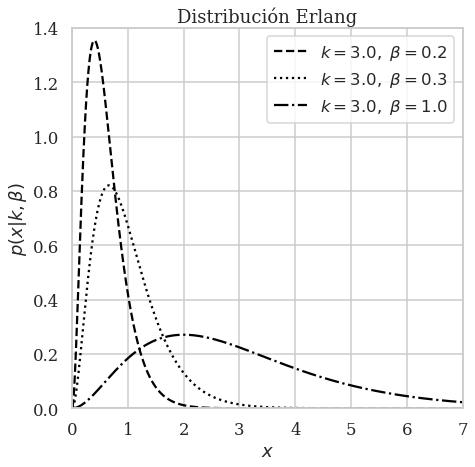

In [51]:
# Erlang Distribution
# Probability Density Function
k = [3,3,3]
beta = [0.2,0.33,1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(k, beta, linestyles):
    dist = stats.erlang(a=a, scale=b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 1.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k,\beta)$')
plt.title(r'Distribución Erlang')

plt.legend(loc='best')
fig.savefig('Erlang.pdf')
plt.show()

In [56]:
#Erlang Distribution
x = np.linspace(-1, 150, 1002)[1:-1]
def interactive_erlang(k,beta):
    plt.figure(figsize=(8,8))
    dist = stats.erlang(a=k, scale=beta) 
    v=dist.pdf(x)
    m = np.max(v)
    plt.plot(x, v, c='black',
    label=r'$k=%.1f,\ \beta=%.1f$' % (k, beta))
    #plt.xlim(-0.01, 0)
    plt.ylim(0, m+0.2*m)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\alpha,\beta)$')
    plt.title(r'Distribución Erlang') 
    plt.show()


input1Float = widgets.FloatSlider(value=1, min=0.1, max=5, step=1, description="a :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=1, max=10, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_erlang, k=input1Float, beta=input2Float)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a :', max=5.0, min=0.1, ste…

# Gráfico interactivo de una [Distribución Gamma](https://en.wikipedia.org/wiki/Gamma_distribution)

In [41]:
def interactive_gamma_histogram(a,b,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.gamma(a, b)
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('$p(x|a,b)$')
    plt.title('Distribución Gamma')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=0.1, min=0.01, max=10, step=0.01, description="a :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=0.1, min=0.01, max=5, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_gamma_histogram, a=input1Float, b=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='a :', max=10.0, min=0.01, s…

## Función de Densidad de Probabilidad

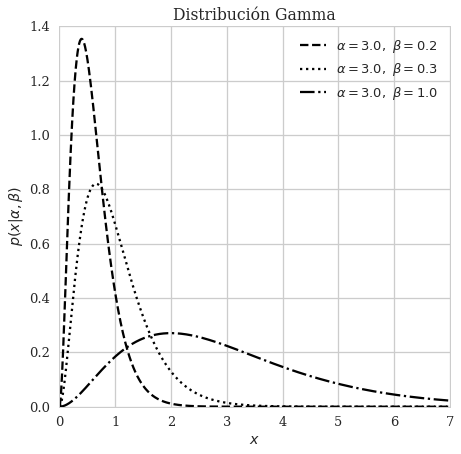

In [107]:
# Gamma Distribution 
# Probability Density Function
k = [3,3,3]
beta = [0.2,0.33,1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(k, beta, linestyles):
    dist = stats.gamma(a=a, scale=b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 1.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Gamma')

plt.legend(loc='best')
#fig.savefig('gammaPDF.pdf')
plt.show()

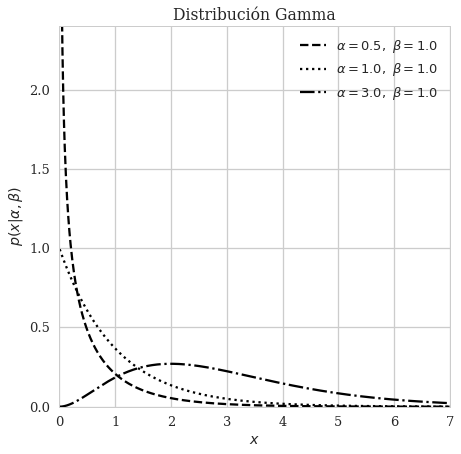

In [108]:
### Gamma Distribution 
# Probability Density Function
alpha = [0.5,1,3]
beta = [1,1,1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(alpha, beta, linestyles):
    dist = stats.gamma(a=a, scale=b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 2.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Gamma')

plt.legend(loc='best')
#fig.savefig('gammaPDF2.pdf')
plt.show()

# Gráfico interactivo de una [Distribución Lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution) 

In [36]:
def interactive_lognormal_histogram(a,b,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.lognorm(s=a, scale=np.exp(b))
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('$p(x|a,b)$')
    plt.title('Distribución Lognormal')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=0.1, min=0.01, max=5, step=0.01, description="s :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=0.1, min=0.5, max=10, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_lognormal_histogram, a=input1Float, b=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='s :', max=5.0, min=0.01, st…

## Función de Densidad de Probabilidad

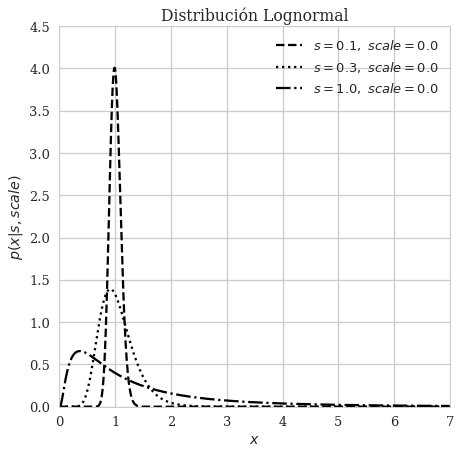

In [109]:
### Lognormal Distribution 
# Probability Density Function
scale = [0,0,0]
s = [0.1,0.3,1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(s,scale, linestyles):
    dist = stats.lognorm(s=a, scale=np.exp(b))

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$s=%.1f,\ scale=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 4.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|s, scale)$')
plt.title(r'Distribución Lognormal')

plt.legend(loc='best')
#fig.savefig('lognormPDF.pdf')
plt.show()

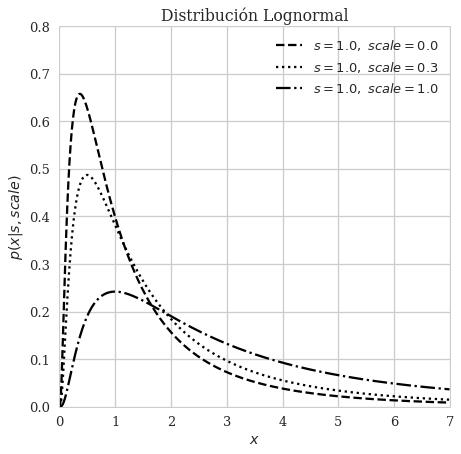

In [110]:
### Lognormal Distribution 
# Probability Density Function
k = [0,0.3,1]
beta = [1,1,1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(beta,k, linestyles):
    dist = stats.lognorm(s=a, scale=np.exp(b))

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$s=%.1f,\ scale=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 0.8)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|s,scale)$')
plt.title(r'Distribución Lognormal')
plt.legend(loc='best')
#fig.savefig('lognormPDF2.pdf')
plt.show()

In [35]:
#Lognormal Distribution
x = np.linspace(0, 70, 1002)[1:-1]
def interactive_lognormal(s,scale):
    plt.figure(figsize=(8,8))
    dist = stats.lognorm(s=s, scale=np.exp(scale))
    v=dist.pdf(x)
    m = np.max(v)
    plt.plot(x, v, c='black',
    label=r'$s=%.1f, scale=%.1f$' % (s, scale))
    plt.xlim(-0.2, 70)
    plt.ylim(0, m+0.2*m)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|s,scale)$')
    plt.title(r'Distribución Lognormal') 
    plt.show()


input1Float = widgets.FloatSlider(value=0.5, min=0.01, max=3, step=0.01, description="s :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=0.01, min=0, max=3, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_lognormal, s=input1Float, scale=input2Float)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='s :', max=3.0, min=0.01, st…

# Gráfico de una [Distribución Weibull](https://en.wikipedia.org/wiki/Weibull_distribution)

In [47]:
def interactive_weibull_histogram(a,b,samples,bins):
    plt.figure(figsize=(5,5))
    distribution = stats.weibull_min(c=a, scale=b)
    aleatorios = distribution.rvs(samples)
    cuenta, cajas, ignorar = plt.hist(aleatorios, bins)
    plt.xlabel('$x$')
    plt.ylabel('$p(x|a,b)$')
    plt.title('Distribución Weibull')
    plt.legend(loc='best')
    plt.show()


input1Float = widgets.FloatSlider(value=0.5, min=0.5, max=2, step=0.01, description="c :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)
input3Float = widgets.IntSlider(value=500, min=100, max=10000, step=50, description="samples :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)
input4Float = widgets.IntSlider(value=10, min=5, max=50, step=1, description="bins :", orientation="horizontal", readout=True,
                readout_format='d',disabled=False, continuous_update=False)

widgets.interactive(interactive_weibull_histogram, a=input1Float, b=input2Float, samples=input3Float, bins=input4Float)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='c :', max=2.0, min=0.5, ste…

## Función de Densidad de Probabilidad

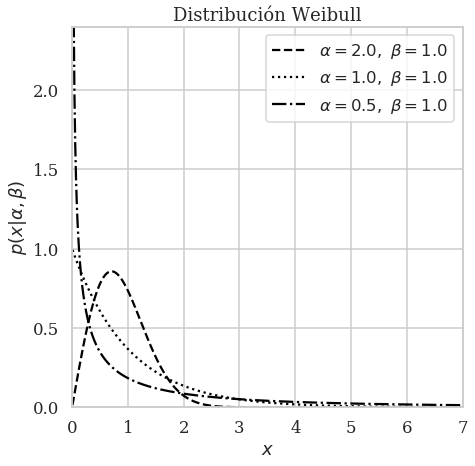

In [37]:
### Weibull Distribution 
# Probability Density Function
alpha = [2,1,0.5]
beta = [1,1,1]
linestyles = ['--', ':', '-.']
x = np.linspace(0, 7, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(7,7))

for a, b, ls in zip(alpha, beta, linestyles):
    dist = stats.weibull_min(c=a, scale=b)
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 7)
plt.ylim(0, 2.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title(r'Distribución Weibull')

plt.legend(loc='best')
#fig.savefig('weibull.pdf')
plt.show()

In [42]:
#Lognormal Distribution
x = np.linspace(-1, 15, 1002)[1:-1]
def interactive_weibull(a,b):
    plt.figure(figsize=(8,8))
    dist = stats.weibull_min(c=a, scale=b)
    v=dist.pdf(x)
    m = np.max(v)
    plt.plot(x, v, c='black',
    label=r'$c=%.1f,\ scale=%.1f$' % (a, b))
    plt.xlim(-1, 15)
    plt.ylim(0, m+0.2*m)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|c,scale)$')
    plt.title(r'Distribución Weibull') 
    plt.show()


input1Float = widgets.FloatSlider(value=0.1, min=0.01, max=3, step=0.01, description="c :", orientation="horizontal",continuous_update=False)
input2Float = widgets.FloatSlider(value=0.1, min=0.01, max=3, step=0.01, description="scale :", orientation="horizontal",continuous_update=False)

widgets.interactive(interactive_weibull, a=input1Float, b=input2Float)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='c :', max=3.0, min=0.01, st…